# Clustering with Scipy 


## Simple Clustering on dummy data
Let us try the k-means clustering algorithm for clustering some random numbers between 0 and 1. The Python library and Scipy have some inbuilt methods to perform the algorithm and return a list defining which observation belongs to which cluster:

Define a set of observations consisting of random numbers ranging from 0 to 1. In this case, we have defined an observation set of 30x3:

In [1]:
import numpy as np
obs=np.random.random(90).reshape(30,3)
obs

array([[0.24926752, 0.31874793, 0.82525494],
       [0.33338933, 0.10616809, 0.21090907],
       [0.93145971, 0.04627698, 0.90380029],
       [0.06383004, 0.60219635, 0.55046697],
       [0.99098177, 0.14444374, 0.59930166],
       [0.88284888, 0.97682571, 0.1368186 ],
       [0.77847351, 0.64777086, 0.682053  ],
       [0.21081816, 0.93998846, 0.46207276],
       [0.52045778, 0.89383492, 0.14294344],
       [0.31024555, 0.31606558, 0.18951232],
       [0.02322318, 0.89596442, 0.18710489],
       [0.56429317, 0.42169365, 0.63329882],
       [0.07373313, 0.78944879, 0.44400829],
       [0.72901388, 0.13251107, 0.17971103],
       [0.27219172, 0.27001971, 0.91172212],
       [0.82888663, 0.71024761, 0.66370772],
       [0.19079904, 0.12962948, 0.0794686 ],
       [0.98567793, 0.87508009, 0.40306244],
       [0.51710338, 0.09730527, 0.05203783],
       [0.22953503, 0.95391852, 0.8997994 ],
       [0.08896461, 0.93862257, 0.13704437],
       [0.5268247 , 0.10281705, 0.59748638],
       [0.

Decide that we want two clusters (no hard and fast rule, you can try with three clusters also). Select two observations at random to make them cluster centroids:
Selecting two rows (out of 30) at random to be initial cluster centers
The two rows in the clust_cen array correspond to the two cluster centroids.

In [2]:
c1=np.random.choice(range(len(obs)))
c2=np.random.choice(range(len(obs)))
clust_cen=np.vstack([obs[c1],obs[c2]])
clust_cen

array([[0.92266329, 0.86871851, 0.92924473],
       [0.19079904, 0.12962948, 0.0794686 ]])


With the number of clusters and cluster centroids defined, we are ready to implement the k-means clustering. This can be done using the cluster method of Scipy:


In [3]:
from scipy.cluster.vq import vq
vq(obs,clust_cen)


(array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 0], dtype=int32),
 array([0.77160976, 0.19534335, 0.82288205, 0.679176  , 0.79881399,
        0.80075684, 0.36154158, 0.85443112, 0.83469388, 0.24725595,
        0.7917932 , 0.64485995, 0.76285984, 0.54747791, 0.84792695,
        0.32313619, 0.        , 0.5299803 , 0.32904684, 0.69896556,
        0.81740751, 0.61804091, 0.47974207, 0.34494193, 0.47776634,
        0.65009869, 0.        , 0.49548178, 0.93260699, 0.51151713]))

Cluster label and distance from cluster centers for each observation
The first array gives us the information as to which cluster the observation belongs to. The first observation belongs to cluster c2, the second observation belongs to c1, the third belongs to c2, the fourth to c1, and so on.

The second array gives the distance of the observation from the final cluster centroid. Hence, the first observation is at a distance of 0.33 units from the centroid of the cluster c2, the second observation is at a distance of 0.43 from the centroid of the cluster c1, and so on.

Find the cluster centroid for the two clusters. This is done using the kmeans method in Scipy:


In [4]:
from scipy.cluster.vq import kmeans
kmeans(obs,clust_cen)


(array([[0.77440663, 0.60332751, 0.65111842],
        [0.30611081, 0.43644151, 0.38735099]]), 0.41792644434971443)

The final cluster centers and the value of the squared error function or J-score
The two rows in the array correspond to the two final cluster centroids. The centroid of the first cluster is at (0.524, 0.837, 0.676). The number at the end is the value of the squared error function or J-score, which we seek to minimize. Its value comes out to be 0.35.

K-means also works if one provides just the number of required clusters and not the cluster centroids. If only the required number of clusters is provided, then the method will randomly select that many observations at random from the observation set to become a cluster centroid. Thus, we could have also written the following:


In [5]:
from scipy.cluster.vq import kmeans
kmeans(obs,2)


(array([[0.25944554, 0.74364948, 0.32292396],
        [0.65725052, 0.39965772, 0.60420171]]), 0.42546009638175286)

## Clustering on real data
Now, as we understand the mathematics behind the k-means clustering better, let us implement it on a dataset and see how to glean insights from the performed clustering.

The dataset we will be using for this is about wine. Each observation represents a separate sample of wine and has information about the chemical composition of that wine. 

Some wine connoisseur painstakingly analyzed various samples of wine to create this dataset. Each column of the dataset has information about the composition of one chemical. There is one column called quality as well, which is based on the ratings given by the professional wine testers.

The prices of wines are generally decided by the ratings given by the professional testers. However, this can be very subjective and certainly there is a scope for a more logical process to wine prices. One approach is to cluster them based on their chemical compositions and quality and then price the similar clusters together based on the desirable components present in the wine clusters.

### Importing and exploring the dataset
Let us import and have a look at this dataset:


In [1]:
import pandas as pd
df=pd.read_csv('wine.csv',sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let us focus on the quality variable for a while and plot a histogram to see the number of wine samples in each quality type:

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

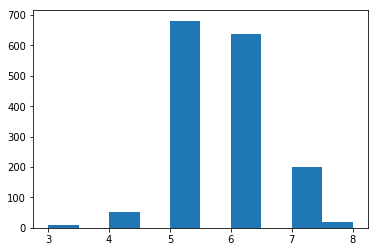

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['quality'])

As it is evident from the plot, more than 75% of the samples were assigned the quality of 5 and 6. Also, let's look at the mean of the various chemical compositions across samples for the different groups of the wine quality:

In [10]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Some observations based on this table are as follows:
•	The lesser the volatile acidity and chlorides, the higher the wine quality
•	The more the sulphates and citric acid content, the higher the wine quality
•	The density and pH don't vary much across the wine quality
Next, let's proceed with clustering these observations using k-means.


Normalizing the values in the dataset
As discussed, normalizing the values is important to get the clustering right. This can be achieved by applying the following formula to each value in the dataset:

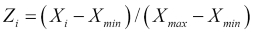
 
To normalize our dataset, we write the following code snippet:


In [11]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head() 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


# Clustering with scikit-learn

K-Means clustering using scikit-learn Let us randomly choose 6 as the required number of clusters for now as there were that many groups of quality in the dataset. Then, to cluster the observations, one needs to write the following code snippet:

The code below fits the k-means clustering model to the wine dataset. To know which observation belongs to which of the clusters, one can call the labels_ parameter of the model. It returns an array depicting the cluster the row belongs to: model.labels_


In [12]:
from sklearn.cluster import KMeans
from sklearn import datasets
model=KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

For better observation, let us make this array part of the data frame so that we can look at the cluster each row belongs to, in the same data frame:

In [13]:
md=pd.Series(model.labels_)
df_norm['clust']=md
df_norm.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,4


The last column clust of the data frame denotes the cluster to which that particular observation belongs. The 1st, 2nd, 3rd, and 5th observations belong to the 3rd cluster (counting starts from 0), while the 4th observation belongs to the 2nd cluster.

The final cluster's centroids for each cluster can be found out as follows:

In [14]:
model.cluster_centers_

array([[0.36290046, 0.15975098, 0.42329457, 0.10547414, 0.10543412,
        0.16350038, 0.08386063, 0.40849071, 0.41863517, 0.23557536,
        0.49129398, 0.69689922],
       [0.31657408, 0.27714878, 0.30457413, 0.15202455, 0.12698872,
        0.38048163, 0.29785645, 0.5390477 , 0.43592737, 0.17890402,
        0.21400954, 0.45615142],
       [0.17610619, 0.32432996, 0.08913043, 0.09416319, 0.09608042,
        0.24856093, 0.12292211, 0.32587627, 0.57733653, 0.18516011,
        0.48637681, 0.61043478],
       [0.57677683, 0.20241599, 0.50726562, 0.13187607, 0.13031485,
        0.13743398, 0.0910032 , 0.65313819, 0.33569144, 0.22445734,
        0.29060497, 0.55      ],
       [0.26395373, 0.35904298, 0.12348425, 0.09132645, 0.12283596,
        0.14482367, 0.10768343, 0.49211153, 0.48648397, 0.1554293 ,
        0.22016455, 0.43976378],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821,

Note that each cluster centroid would have 12 coordinates as there are 12 variables in the dataset.

Let us plot a histogram for the clust variable to get an idea of the number of observations in each cluster:

Text(0, 0.5, 'Frequency')

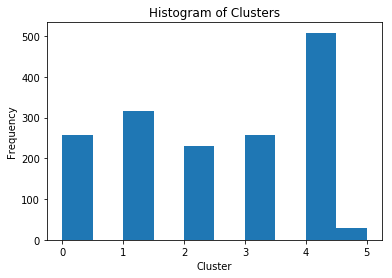

In [15]:
import matplotlib.pyplot as plt
plt.hist(df_norm['clust'])
plt.title('Histogram of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

As can be observed, the number of wine samples is more uniformly (or rather normally) distributed in this case when compared to the distribution based on the wine quality. This is an improvement from the classification based on the wine quality as it provides us with better segregated and identifiable clusters.

## Interpreting the cluster
This clustering can be used to price the wine samples in the same cluster similarly and target the customers who prefer the particular ingredient of wine by marketing them as a different brand having that ingredient as its specialty.
Let us calculate the mean of the composition for each cluster and each component. If you observe the output table, it is exactly similar to the six cluster centroids observed above. This is because the cluster centroids are nothing but the mean of the coordinates of all the observations in a particular cluster:


In [16]:
df_norm.groupby('clust').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
clust,,,,,,,,,,,,
0,0.362900,0.159751,0.423295,0.105474,0.105434,0.163500,0.083861,0.408491,0.418635,0.235575,0.491294,0.696899
1,0.316574,0.277149,0.304574,0.152025,0.126989,0.380482,0.297856,0.539048,0.435927,0.178904,0.214010,0.456151
2,0.176106,0.324330,0.089130,0.094163,0.096080,0.248561,0.122922,0.325876,0.577337,0.185160,0.486377,0.610435
3,0.576777,0.202416,0.507266,0.131876,0.130315,0.137434,0.091003,0.653138,0.335691,0.224457,0.290605,0.550000
4,0.263954,0.359043,0.123484,0.091326,0.122836,0.144824,0.107683,0.492112,0.486484,0.155429,0.220165,0.439764
5,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667


The wine quality and taste mainly depends on the quantity of acid, alcohol, and sugar. A few examples of how the information on clustering can be used for efficient marketing and pricing are as follows:
•	People from cooler regions prefer wines with higher volatile acid content. So, clusters 2 and 5 can be marketed in cooler (temperature-wise) markets.
•	Some people might prefer wine with higher alcohol content, and the wine samples from clusters 3 and 5 can be marketed to them.
•	Some connoisseurs trust others' judgment more and they might like to go with professional wine testers' judgments. These kinds of people should be sold the wine samples from clusters 3 and 5 as they have high mean quality.
More information from the wine industry can be combined with this result to form a better marketing and pricing strategy.


## Hierarchical clustering using scikit-learn
Hierarchical clustering or agglomerative clustering can be implemented using the AgglomerativeClustering method in scikit-learn's cluster library as shown in the following code. It returns a label for each row denoting which cluster that row belongs to. The number of clusters needs to be defined in advance. We have used the ward method of linkage:


In [17]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)
md=pd.Series(ward.labels_)


We can plot a histogram of cluster labels to get a sense of how many rows belong to a particular cluster:

The plot looks as follows. The observations are more uniformly distributed across the cluster except Cluster 2 that has more observations than the others:

Text(0, 0.5, 'Frequency')

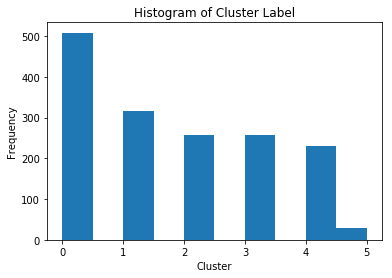

In [18]:
import matplotlib.pyplot as plt
plt.hist(md)
plt.title('Histogram of Cluster Label')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

It also outputs the children for each non-leaf node. This would be an array with the shape (number of non-leaf nodes, 2) as there would be two immediate children for any non-leaf node:

In [19]:
ward.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3189, 3192],
       [3186, 3193],
       [3194, 3195]])

The child array containing two child elements for each non-leaf node